<a href="https://colab.research.google.com/github/YeonJin55/Implementation-of-machine-learning-algorithm-through-real-life-examples/blob/main/5%EC%A3%BC%EC%B0%A8_2_3%EC%B0%A8%EC%8B%9C_(kNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *k*-Nearest Neighbor 알고리즘을 이용한 Iris 데이터셋 분류 

Iris 데이터셋은 머신러닝 분야에서 많이 *사용하는* 데이터셋 중 하나로

Setosa, Versicolour, and Virginica 세 종류의 붓꽃을 대상으로 

Sepal Length/Width 꽃받침의 길이와 너비

Petal Length/Width 꽃잎의 너비를 기록하고있습니다.

붓꽃 수 150개 종류별로 50개씩
각각의 붓꽃 데이터는 (꽃받침의 길이, 너비, 꽃잎의 길이, 너비, 어떤 종류인지 문자열) 의 형태이다.

수치형 데이터 4가지는 4차원 공간 상의 점이라고 볼 수 있다. 종류는 정답 레이블, 따라서 (1, 2, 3, 4)데이터 받으면 어떤 종류인지 3가지 중, 예측

In [1]:
import seaborn as sns
iris = sns.load_dataset("iris")
print(type(iris))


<class 'pandas.core.frame.DataFrame'>


iris 데이터셋에 속한 랜덤한 데이터를 확인해보겠습니다.

데이터프레임의 첫 5 row, 마지막 5 row를 살펴보려면 head() 와 tail() 을 사용합니다.

In [2]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
print(iris.tail())

     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


데이터가 iris의 종을 기준으로 정렬되어있으므로, 여러 종의 데이터를 확인하기 위하여 랜덤하게 10개의 row를 선택해보겠습니다.

In [5]:
print(iris.sample(10)) #샘플링 하고자 하는 개수 입력

     sepal_length  sepal_width  petal_length  petal_width     species
123           6.3          2.7           4.9          1.8   virginica
12            4.8          3.0           1.4          0.1      setosa
23            5.1          3.3           1.7          0.5      setosa
86            6.7          3.1           4.7          1.5  versicolor
68            6.2          2.2           4.5          1.5  versicolor
79            5.7          2.6           3.5          1.0  versicolor
85            6.0          3.4           4.5          1.6  versicolor
111           6.4          2.7           5.3          1.9   virginica
49            5.0          3.3           1.4          0.2      setosa
56            6.3          3.3           4.7          1.6  versicolor


각 데이터는 종, 꽃받침의 길이/너비, 꽃잎의 길이/너비 로 구성되어있으며 단위는 cm 입니다.

Pandas에서 제공하는 기능들을 활용하면 데이터셋에 대해 더 많은 정보를 알아낼 수 있습니다.

In [8]:
import pandas as pd
print(pd.value_counts(iris['species'])) #범주형 데이터 "종류" 컬럼 선택, 개수 알아내는 함수 실행

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


In [9]:
print(pd.value_counts(iris['petal_width'])) #수치형 데이터에 대한 카운트 함수는 큰 의미가 없다. 

0.2    29
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
2.1     6
2.0     6
0.1     5
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal_width, dtype: int64


In [11]:
print(iris.describe()) #수치형 데이터는 describe를 통해 의미있는 분석을 진행한다. 데이터 프레임 전체를 전달하면 된다.

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


다음으로는 seaborn library를 활용하여 Iris 데이터셋의 시각화를 수행해보겠습니다.

pairplot 을 활용하면 각 column에 속하는 데이터의 분포와

두 column에 속하는 데이터 사이의 상관관계를 파악할 수 있습니다

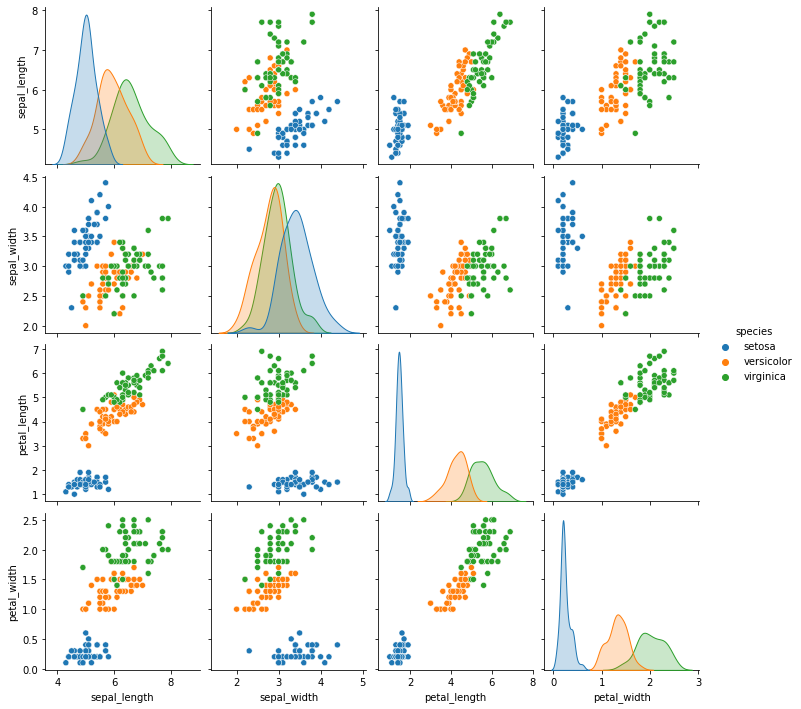

In [12]:
sns.pairplot(iris, hue="species") #데이터 프레임 전달. 종 별로 분류하려 함. 어떤 컬럼을 기준으로 종을 분류해야 하는지 값을 전달

x, y축 동일한 컬럼이 입력될 경우, 모든 점이 y-x 위에 표현되기에 각 값 하나에 대해 어떻게 분포하는지를 보여주는 것이 더 유용하다. 이때의 실제 y축은 빈도수의 의미를 갖는다.

상대적으로 구분이 쉬운 setosa(blue) 를 제외하고 나머지 두 종류만 비교해보겠습니다.

<class 'pandas.core.series.Series'>
0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool


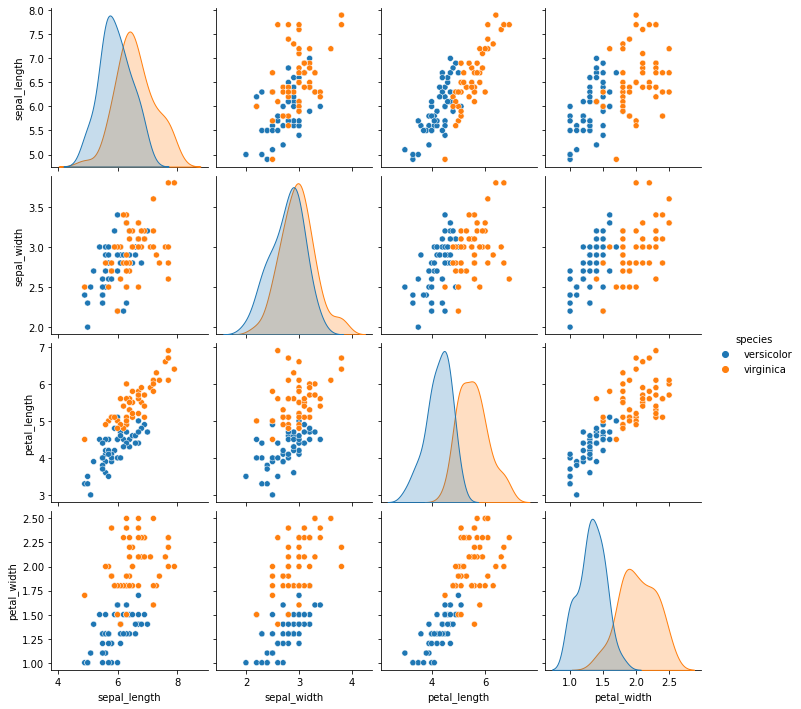

In [ ]:
mask = iris["species"]!='setosa' #iris 데이터프레임의 specise가 setosa가 아닌 경우를 True로 주는 mask 생성
print(type(mask))
print(mask) #시리즈 형태
sns.pairplot(iris[mask], hue="species") #데이터 프레임 중 True인 row만 선택하게 된다. 50~149 인덱스만 pairplot에 전달

# Train/Test 데이터의 분류 

보유한 데이터를 학습용 데이터와 확인용 데이터로 구분한 뒤, 

학습용 데이터를 활용하여 머신러닝 알고리즘 (*k*-NN)의 학습을 진행하고 

학습에 활용하지 않은 확인용 데이터를 이용해서 성능을 검증합니다.

학습용 데이터와 검증용 데이터를 분리하기 위해서 train_test_split을 이용합니다.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,  X_test,  y_train,  y_test = train_test_split(iris.drop('species',axis = 1),
                                                       iris [ 'species' ] , test_size = 0.25,
                                                       random_state = 7 )

In [ ]:
print(X_train.head())
print(y_train.head())

     sepal_length  sepal_width  petal_length  petal_width
17            5.1          3.5           1.4          0.3
102           7.1          3.0           5.9          2.1
124           6.7          3.3           5.7          2.1
76            6.8          2.8           4.8          1.4
132           6.4          2.8           5.6          2.2
17         setosa
102     virginica
124     virginica
76     versicolor
132     virginica
Name: species, dtype: object


In [ ]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


# *k*-NN 모델 선언과 학습

scikit-learn 의 KNeighborClassifier을 이용해서 모델을 선언하고,

*k*-NN에 사용할 상수를 지정합니다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

fit() 함수에 학습용 데이터와 학습용 데이터의 정답지를 전달하면 학습이 진행됩니다.

모델의 평가에는 score 함수를 사용하고, 확인용 데이터와 확인용 정답지를 전달하면 정확도가 측정됩니다.

In [ ]:
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.8947368421052632


In [ ]:
predict = knn.predict(X_test)
print(pd.DataFrame({'predict': predict, 
                    'answer': y_test}))

        predict      answer
149   virginica   virginica
84   versicolor  versicolor
40       setosa      setosa
66   versicolor  versicolor
106  versicolor   virginica
41       setosa      setosa
52   versicolor  versicolor
94   versicolor  versicolor
11       setosa      setosa
51   versicolor  versicolor
77    virginica  versicolor
85   versicolor  versicolor
32       setosa      setosa
109   virginica   virginica
28       setosa      setosa
70   versicolor  versicolor
108   virginica   virginica
137   virginica   virginica
46       setosa      setosa
37       setosa      setosa
82   versicolor  versicolor
120   virginica   virginica
63   versicolor  versicolor
119  versicolor   virginica
129   virginica   virginica
138  versicolor   virginica
97   versicolor  versicolor
80   versicolor  versicolor
101   virginica   virginica
140   virginica   virginica
126   virginica   virginica
79   versicolor  versicolor
22       setosa      setosa
139   virginica   virginica
74   versicolor  ver

# 최적의 *k* 탐색

모델에 parameter로 사용할 *k*값들의 후보를 모아놓고

어떤 *k*가 가장 나은 성능을 보이는지를 찾는 방식으로 동작합니다.

In [ ]:
k_list = list(range(1,11))
k = dict(n_neighbors=k_list)
print(k)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


*k*-fold cross validation?

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, k, cv=4, scoring='accuracy')
grid.fit(iris.drop('species', axis=1), iris.species)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(n_neighbors=6),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
grid_table = pd.DataFrame(grid.cv_results_)
print(grid_table)

   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.002905      0.000883  ...        0.029587                4
1       0.002304      0.000011  ...        0.021774                7
2       0.002403      0.000130  ...        0.030143                5
3       0.002332      0.000025  ...        0.022471                8
4       0.002354      0.000078  ...        0.022148                1
5       0.003070      0.000857  ...        0.035316               10
6       0.003911      0.000655  ...        0.011912                2
7       0.002551      0.000105  ...        0.040601                6
8       0.002353      0.000024  ...        0.022471                8
9       0.002494      0.000210  ...        0.011912                2

[10 rows x 13 columns]
